In [1]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(4)
circ.h(3)
circ.cx(3, 2)
circ.cx(2, 1)
circ.cx(1, 0)
circ.measure_all()

In [2]:
from mqt.ddsim import DDSIMProvider

provider = DDSIMProvider()
backend = provider.get_backend("qasm_simulator")
result = backend.run(circ, shots=10000).result()
result.get_counts()

{'0000': 5040, '1111': 4960}

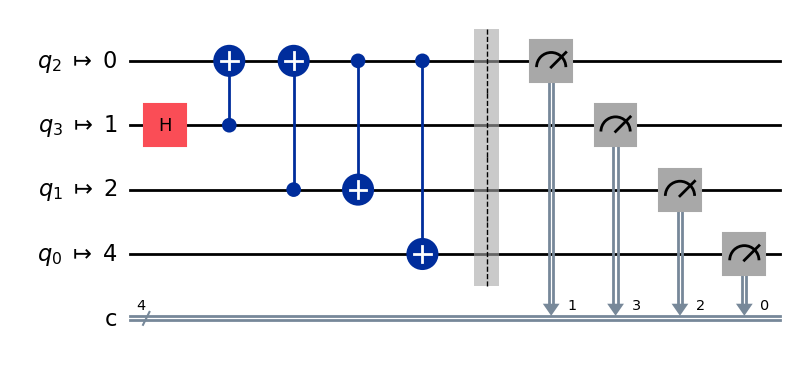

In [3]:
from mqt.qmap.plugins.qiskit.sc import compile
from qiskit.providers.fake_provider import GenericBackendV2

backend = GenericBackendV2(
    num_qubits=5,
    coupling_map=[[0, 1], [1,0], [0, 2], [2, 0], [1, 3], [3, 1], [0, 4], [4, 0]]
)

circ_mapped, results = compile(circ, backend)
circ_mapped.draw(output="mpl")

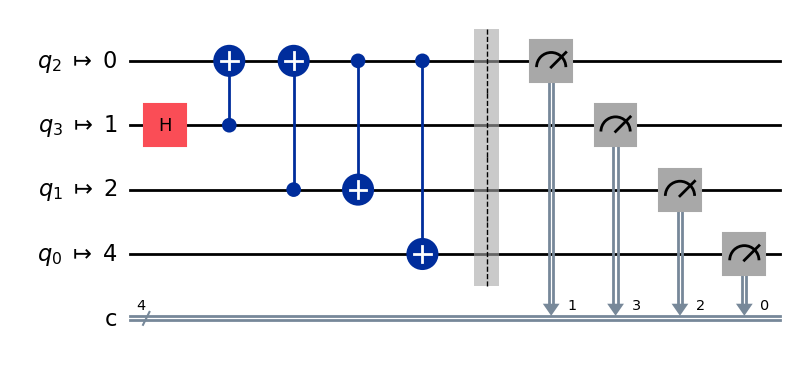

In [4]:
circ_mapped.draw(output="mpl")